In [23]:
import casadi as ca
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from casadi.tools.graph import dotgraph
from IPython.display import Image

def draw_graph(expr):
    return Image(dotgraph(expr).create_png())

# Parameters
$
W = 162,000 lb\\
thrust = 30000 lb\\
S = 2170 ft^2\\
b = 140 ft\\
length = 90 ft\\
I_{yy} = 4.1 e^6 slug-ft^2
$

In [17]:
s = 2170
cbar = 17.5
mass = 5.0e6
iyy = 4.
tstat = 6e4
dtdv = -38
ze = 2
cd_cl_s = 0.042
cl_a = 0.085
cm_a = -0.022
cm_de = -0.016 #per degree
cm_q = 0.16
cm_adot = -6
cl_adot = 0.0
rtod = 57.29578
gd = 32.17


In [18]:
u = ca.SX.sym('u',4)
thtl = u[0]
elev = u[1]
xcg = u[2]
land = u[3]

vt = ca.SX.sym('vt')
alpha = rtod*ca.SX.sym('alpha')
theta = ca.SX.sym('theta')
q = ca.SX.sym('q')
h = ca.SX.sym('h')
x = ca.vertcat(vt,alpha,theta,q,h)


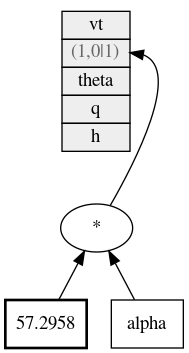

In [22]:
def adc(vt, H):
    ro = 2.377e-3
    tfac = 1-0.0703e-5 * H
    T = 519*tfac
    if H >= 35000:
        T = 390
    rho = r0 * (tfac**4.14)
    mach = vt/np.sqrt(1.4*1716.3*T)
    qbar = 0.5*rho*vt**2
    cps = 1715 * rho*T
    
    qs = qbar*s
    
    
    